# Enhancing Network Security through Ensemble-Based Anomaly Detection 📌


---



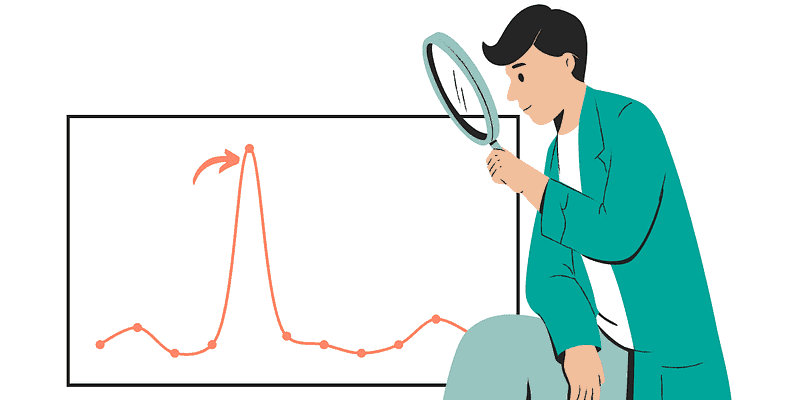

> This project aims to enhance network security using an ensemble of machine learning models for anomaly detection. It will classify network traffic into categories uch as "backdoor," "normal," "scanning," "ransomware," and others. Multiple classifiers (KNN, Logistic Regression, Naive Bayes, AdaBoost) will be trained, and a stacking ensemble will be used to improve detection accuracy. Performance will be evaluated using accuracy, precision, recall, F1-score, and confusion matrix.


### Mounting the Google Drive

In [18]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Data Loading & Preprocessing 🧹


---



### 1.1. Importing the necessary libraries

In [102]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

### 1.2. Loading the dataset

In [103]:
# Loading the dataset
net_df = pd.read_csv('/content/drive/MyDrive/UNSW-NB15.csv')
net_df

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,192.168.1.32,48286,176.28.50.165,80,tcp,http,65.376610,2665,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211039,192.168.1.32,48288,176.28.50.165,80,tcp,http,65.710346,1987,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211040,192.168.1.32,48292,176.28.50.165,80,tcp,http,65.766512,3922,322,S3,...,0,0,-,-,-,-,-,-,1,xss
211041,192.168.1.32,48294,176.28.50.165,80,tcp,http,65.753940,2401,322,S3,...,0,0,-,-,-,-,-,-,1,xss


### 1.3. Chechking the total columns

In [104]:
# chechking the total columns
net_df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

### 1.4. Dataset shape (Rows & Columns)

In [105]:
# Dataset shape
net_df.shape

(211043, 44)

### 1.5. Data general information

In [106]:
# data general information
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

### 1.6. Missing values and their percentages

In [107]:
# Replace '-' with NaN
net_df.replace('-', np.nan, inplace=True)

# Calculate the percentage of missing values for each column
missing_percentage = net_df.isna().mean() * 100

# Filter and show only columns with missing values
missing_columns = missing_percentage[missing_percentage > 0]

# Print columns with missing values and their percentages with the '%' sign
print("Columns with Missing Values and Their Percentages:")
for column, percentage in missing_columns.items():
    print(f"{column}: {percentage:.2f}%")

Columns with Missing Values and Their Percentages:
service: 62.56%
dns_query: 83.49%
dns_AA: 83.41%
dns_RD: 83.41%
dns_RA: 83.41%
dns_rejected: 83.41%
ssl_version: 99.81%
ssl_cipher: 99.81%
ssl_resumed: 99.81%
ssl_established: 99.81%
ssl_subject: 99.99%
ssl_issuer: 99.99%
http_trans_depth: 99.86%
http_method: 99.86%
http_uri: 99.86%
http_version: 99.86%
http_user_agent: 99.86%
http_orig_mime_types: 99.99%
http_resp_mime_types: 99.90%
weird_name: 99.83%
weird_addl: 99.93%
weird_notice: 99.83%


### 1.7. Plotting the heatmap to show missing values


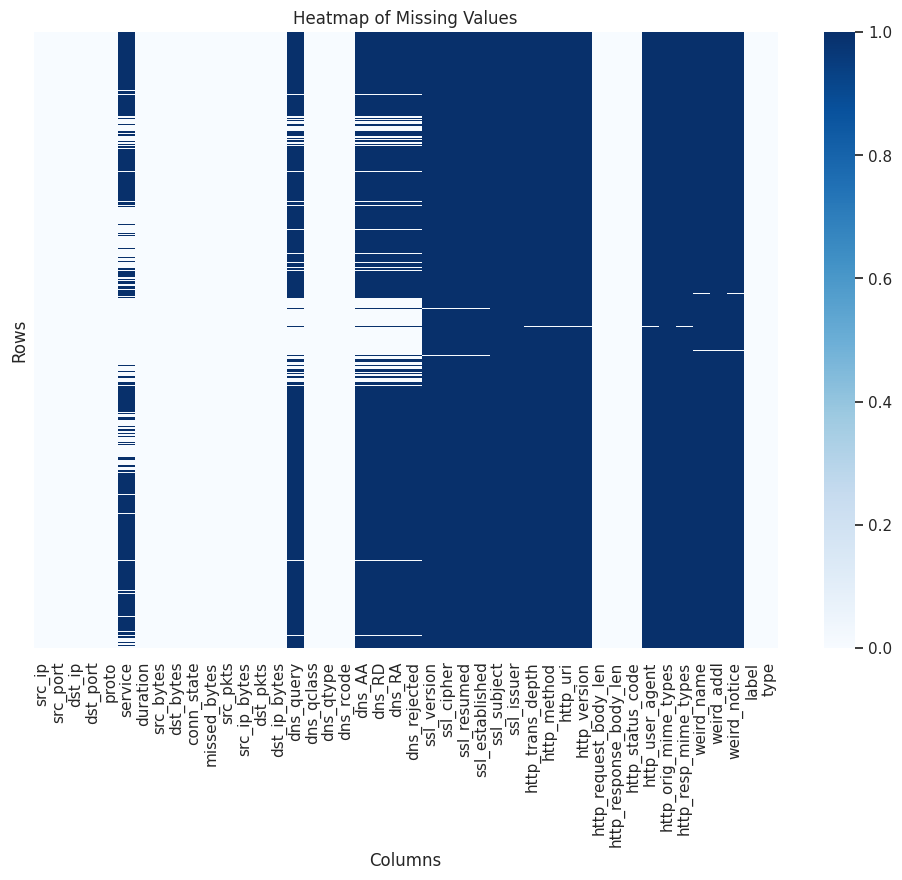

In [108]:
# Plotting the heatmap to show missing values
plt.figure(figsize=(12, 8))
sns.heatmap(net_df.isna(), cbar=True, cmap='Blues', yticklabels=False)

# Set title for the heatmap
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### 1.8. List of columns to drop based on missing value analysis


In [109]:
# List of columns to drop based on missing value analysis
columns_to_drop = [
    'service', 'dns_query', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected',
    'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
    'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version',
    'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
    'weird_addl', 'weird_notice'
]

# Drop the specified columns
net_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Verify the dataset after dropping columns
print("Dataset shape after dropping columns:", net_df.shape)
print("Remaining columns:")
print(net_df.columns)

Dataset shape after dropping columns: (211043, 22)
Remaining columns:
Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'duration',
       'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype',
       'dns_rcode', 'http_request_body_len', 'http_response_body_len',
       'http_status_code', 'label', 'type'],
      dtype='object')


### 1.9. Identify duplicate rows


In [110]:
# Identify duplicate rows
duplicates = net_df.duplicated()

# Display duplicate rows
duplicate_rows = net_df[net_df.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Total number of duplicate rows: {num_duplicates}')

Total number of duplicate rows: 20630


### 1.10. Remove duplicate rows

In [111]:
# Shape of the DataFrame before removing duplicates
shape_before = net_df.shape
print(f'Shape before removing duplicates: {shape_before}')

# Remove duplicate rows and keep the first occurrence
net_df = net_df.drop_duplicates()

# Shape of the DataFrame after removing duplicates
shape_after = net_df.shape
print(f'Shape after removing duplicates: {shape_after}')

Shape before removing duplicates: (211043, 22)
Shape after removing duplicates: (190413, 22)


### 1.11. Checking data information after removing duplicate rows


In [112]:
# Checking data information after removing duplicate rows
net_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190413 entries, 0 to 211042
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190413 non-null  object 
 1   src_port                190413 non-null  int64  
 2   dst_ip                  190413 non-null  object 
 3   dst_port                190413 non-null  int64  
 4   proto                   190413 non-null  object 
 5   duration                190413 non-null  float64
 6   src_bytes               190413 non-null  int64  
 7   dst_bytes               190413 non-null  int64  
 8   conn_state              190413 non-null  object 
 9   missed_bytes            190413 non-null  int64  
 10  src_pkts                190413 non-null  int64  
 11  src_ip_bytes            190413 non-null  int64  
 12  dst_pkts                190413 non-null  int64  
 13  dst_ip_bytes            190413 non-null  int64  
 14  dns_qclass              1

## 2. Exploratory Data Analysis 📊


---



### 2.1. Descriptive statistics

In [30]:
# Descriptive statistics
net_df.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,190413.000000,190413.000000,190413.000000,1.904130e+05,1.904130e+05,1.904130e+05,190413.000000,1.904130e+05,190413.000000,1.904130e+05,190413.000000,190413.000000,190413.000000,190413.000000,1.904130e+05,190413.000000,190413.000000
mean,39760.423616,2134.016196,8.533424,2.860782e+05,2.868436e+05,3.816239e+04,10.558901,8.478315e+02,4.249584,1.755518e+03,251.598930,3.913246,0.137422,0.072506,1.605020e+02,0.327378,0.779495
std,18805.244630,6966.831373,593.910860,1.799693e+07,1.897680e+07,5.539312e+06,96.572157,2.347252e+04,348.157768,2.002163e+05,2859.343512,24.922734,0.628943,9.731238,3.208070e+04,8.597344,0.414588
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,35654.000000,53.000000,0.000009,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,4.800000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,45732.000000,80.000000,0.000390,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.040000e+02,1.000000,4.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,52044.000000,445.000000,0.135985,1.300000e+02,1.780000e+02,0.000000e+00,5.000000,4.230000e+02,2.000000,2.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,65528.000000,65467.000000,93516.929170,3.890855e+09,3.913853e+09,1.854527e+09,24623.000000,6.522626e+06,121942.000000,8.639552e+07,32769.000000,255.000000,5.000000,2338.000000,1.342438e+07,404.000000,1.000000


### 2.2. Boxplots to visualize outliers for all numeric columns


<ipython-input-31-ad3164b597a6>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


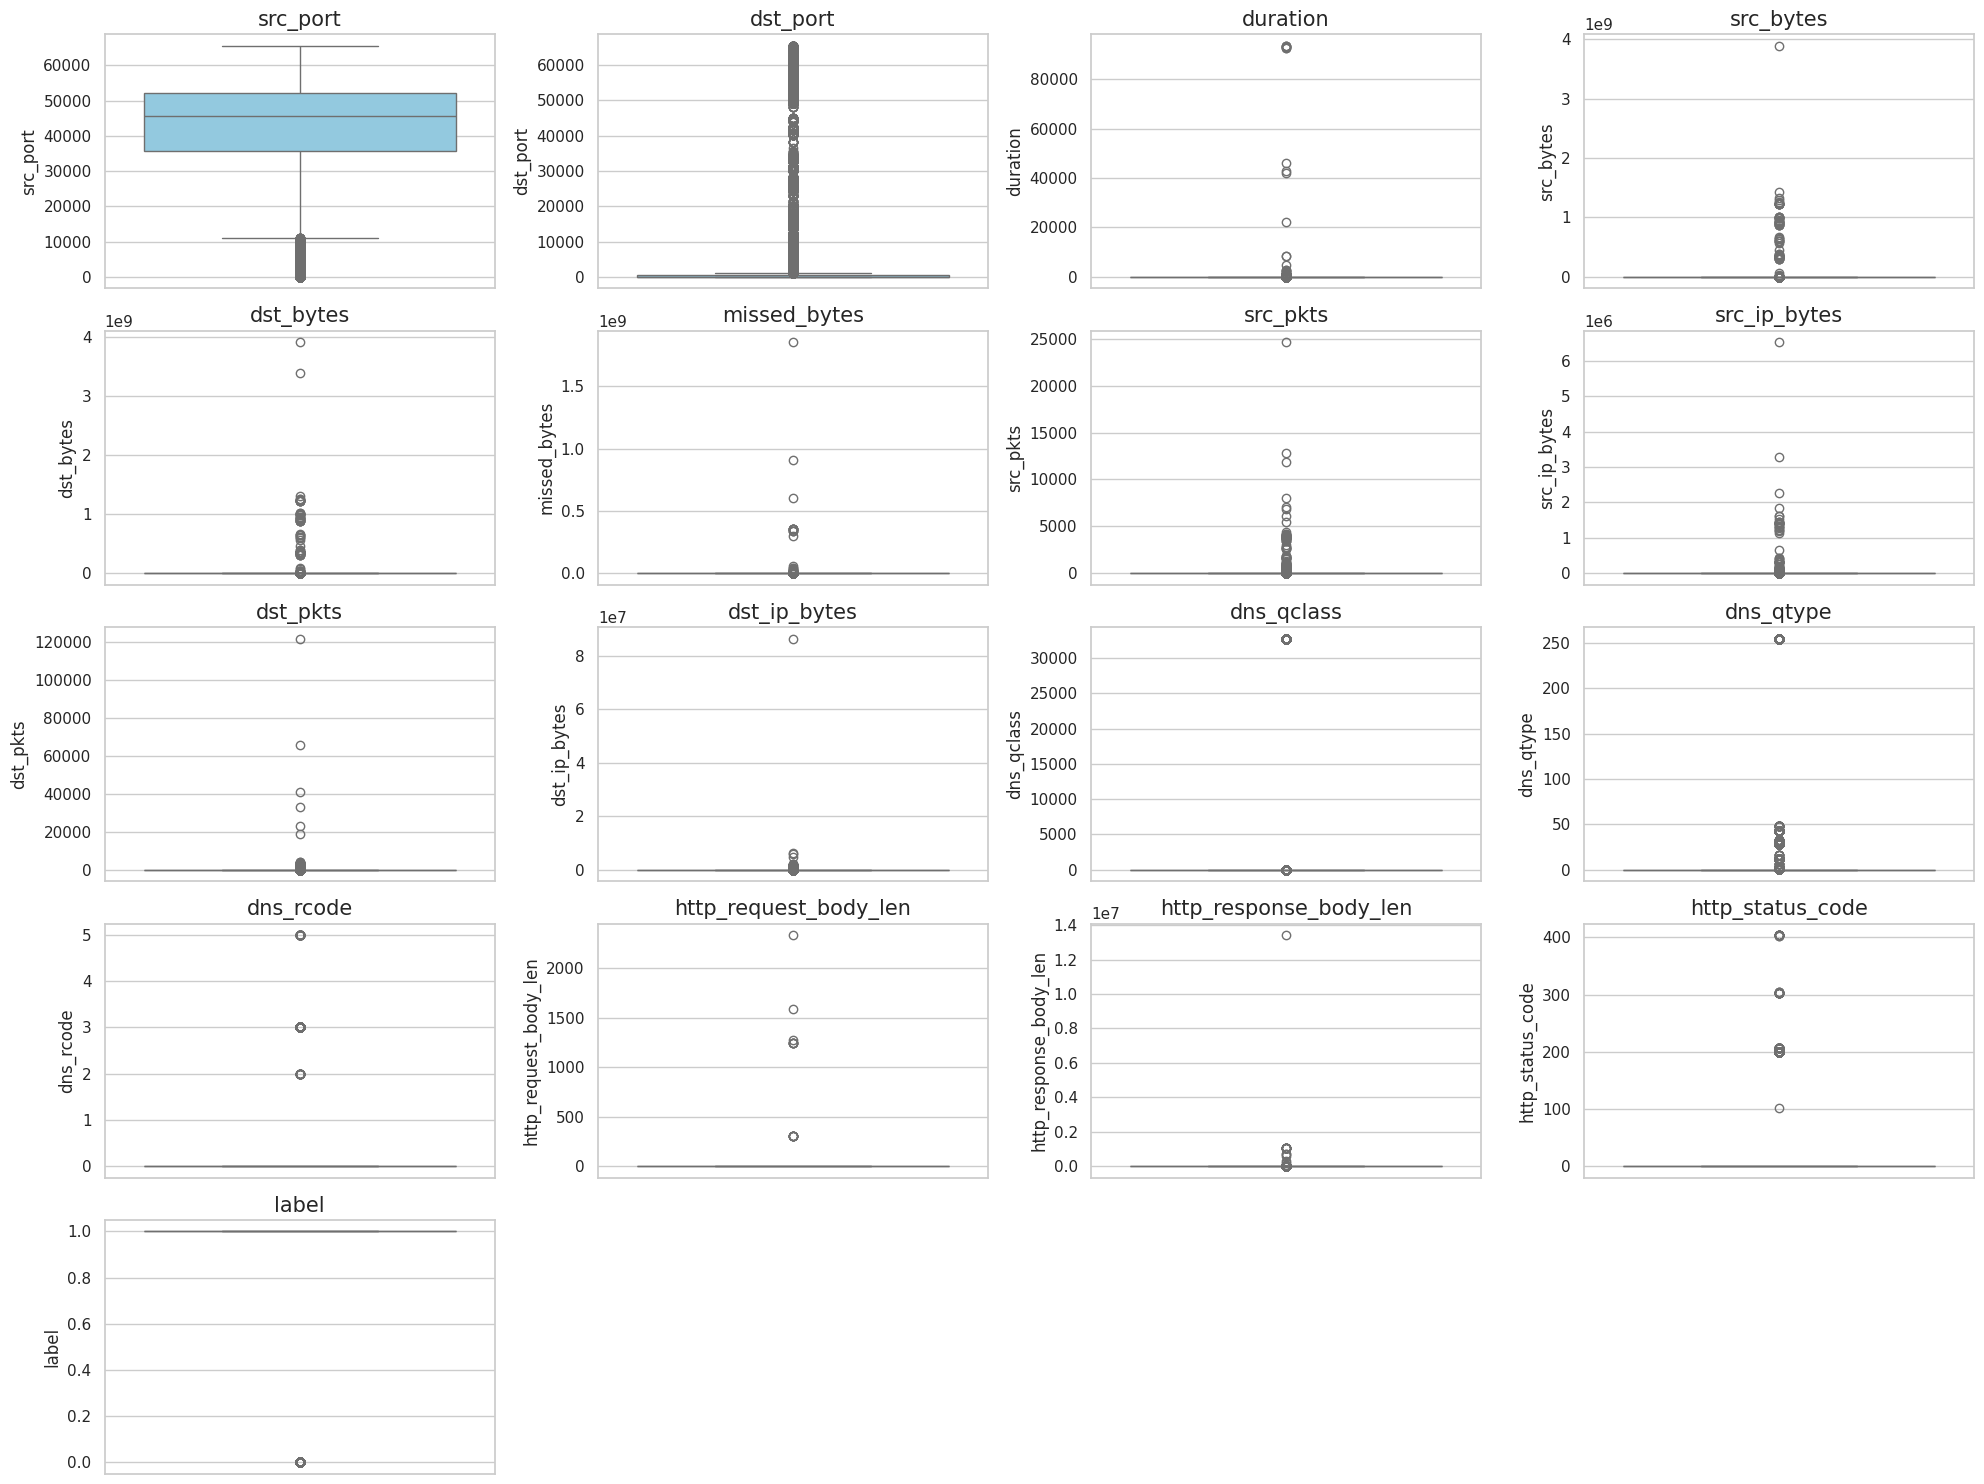

In [31]:
# Select only numeric columns (int and float)
numeric_cols = net_df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots to visualize outliers for all numeric columns
plt.figure(figsize=(20, 15))
plt.style.use('seaborn-muted')

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=net_df[column], color='skyblue')
    plt.title(f'{column}', fontsize=15)
    plt.xlabel('')
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()

### 2.3. Distribution of Normal vs. Anomalous Traffic

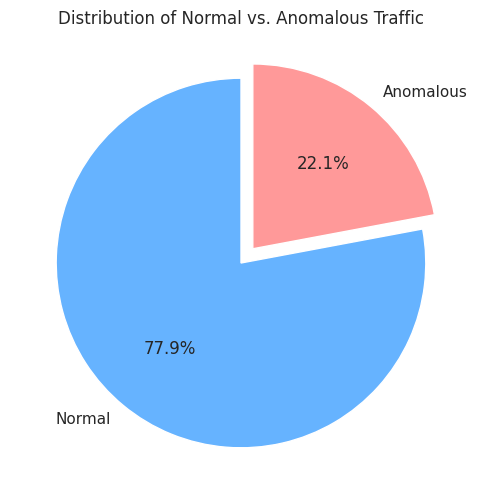

In [32]:
# Calculate the value counts for the label column
label_counts = net_df['label'].value_counts()

# Create labels for the pie chart
labels = ['Normal', 'Anomalous']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0, 0.1))
plt.title('Distribution of Normal vs. Anomalous Traffic')
plt.show()

### 2.4. Distribution of Anomaly Types

<ipython-input-93-8c4c0395135f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')  # Use a color palette


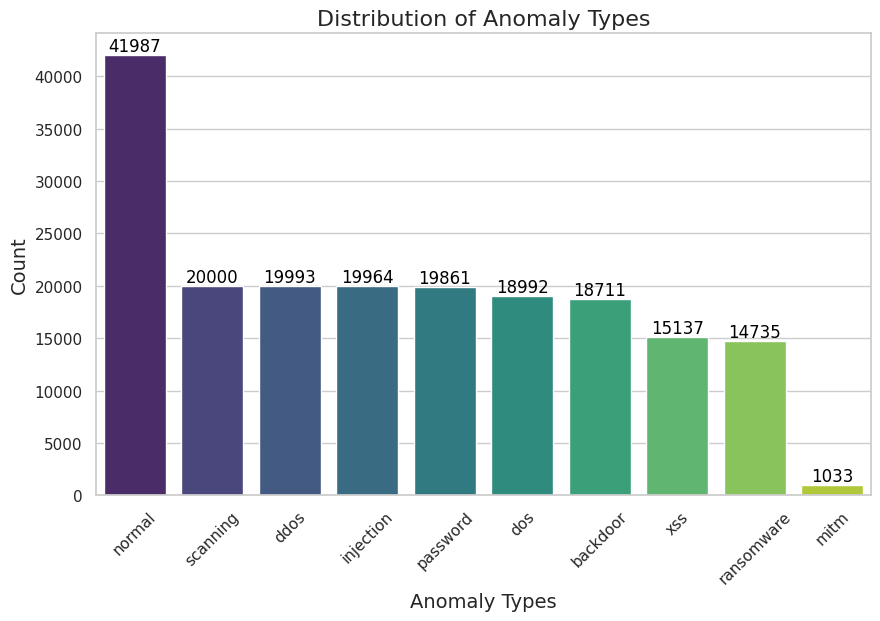

In [93]:
# Set the style for all plots
sns.set(style='whitegrid')

# Count the occurrences of each type
type_counts = net_df['type'].value_counts()

# Create a bar chart for the types with different colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')  # Use a color palette

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)

# Set labels and title
plt.xlabel('Anomaly Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Anomaly Types', fontsize=16)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

### 2.5. Count of Different Protocols

<ipython-input-94-5742eb7276f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=net_df, x='proto', palette='viridis', order=net_df['proto'].value_counts().index)


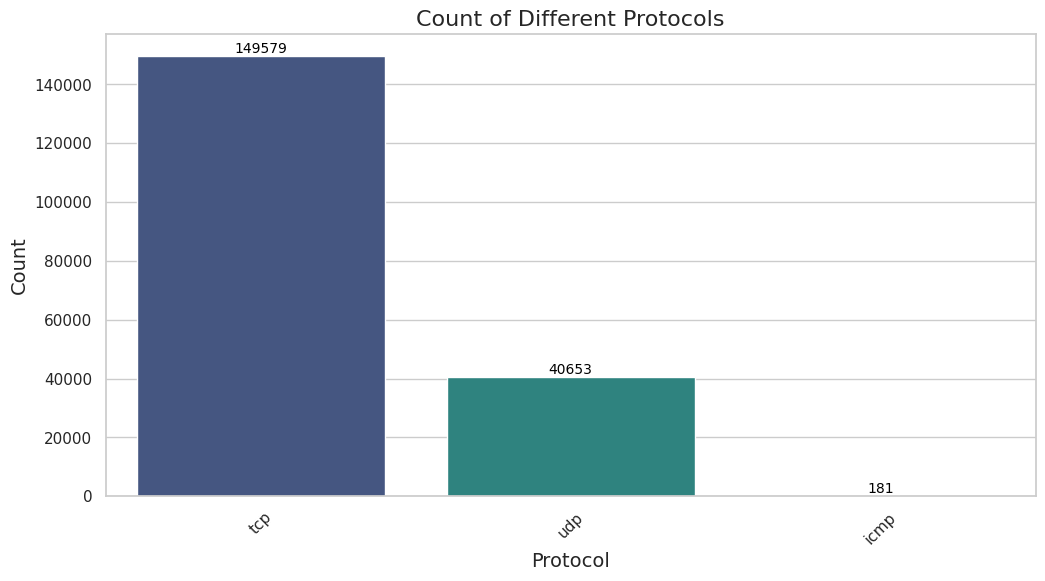

In [94]:
# Count of Different Protocols with value labels on top
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=net_df, x='proto', palette='viridis', order=net_df['proto'].value_counts().index)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)

# Set labels and title
plt.title('Count of Different Protocols', fontsize=16)
plt.xlabel('Protocol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

### 2.6. Count of Different Connection States

<ipython-input-95-fd720f6f8c43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=net_df, x='conn_state', palette='Set1', order=net_df['conn_state'].value_counts().index)


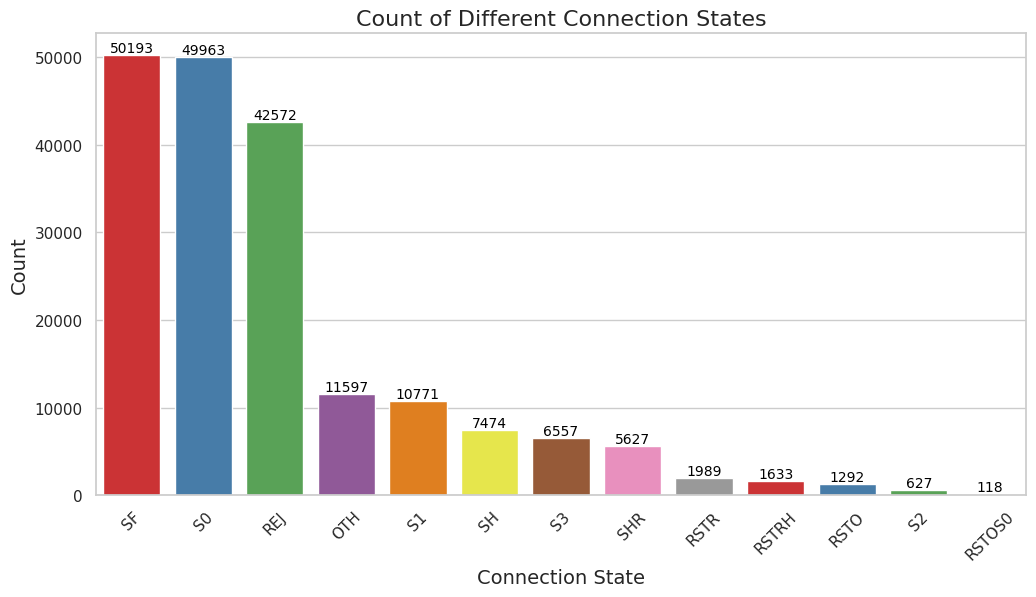

In [95]:
# Count of Different Connection States with value labels on top
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=net_df, x='conn_state', palette='Set1', order=net_df['conn_state'].value_counts().index)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=10)

# Set labels and title
plt.title('Count of Different Connection States', fontsize=16)
plt.xlabel('Connection State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

### 2.7. Source Port vs. Attack Type

<ipython-input-98-c11605dfecfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=net_df, x='type', y='src_port', palette='coolwarm')


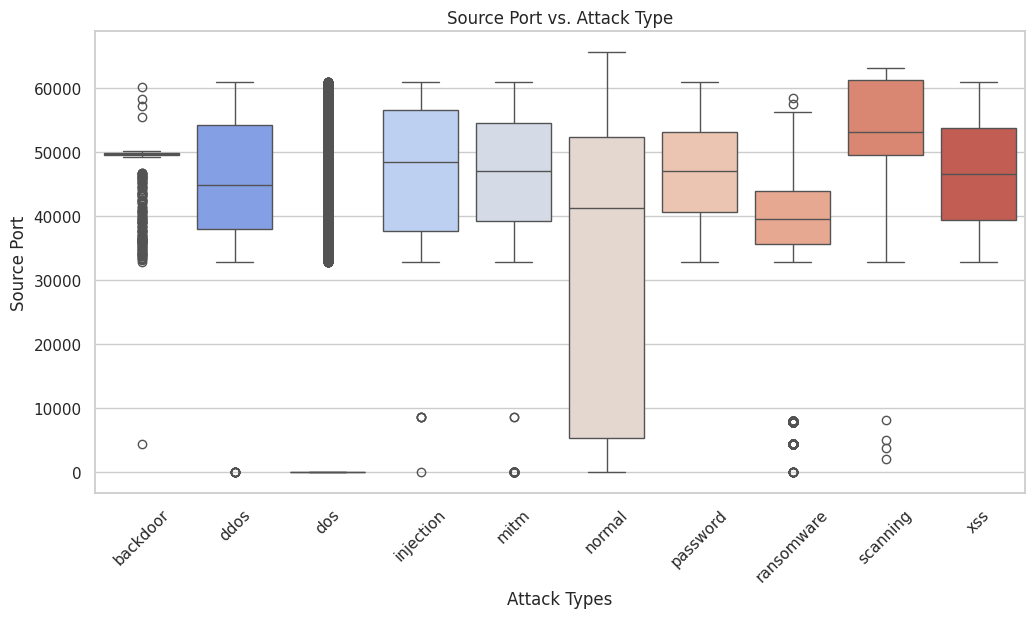

In [98]:
# Source Port vs. Attack Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=net_df, x='type', y='src_port', palette='coolwarm')
plt.title('Source Port vs. Attack Type')
plt.xticks(rotation=45)
plt.xlabel('Attack Types')
plt.ylabel('Source Port')
plt.show()

### 2.8. Connection State by Attack Type

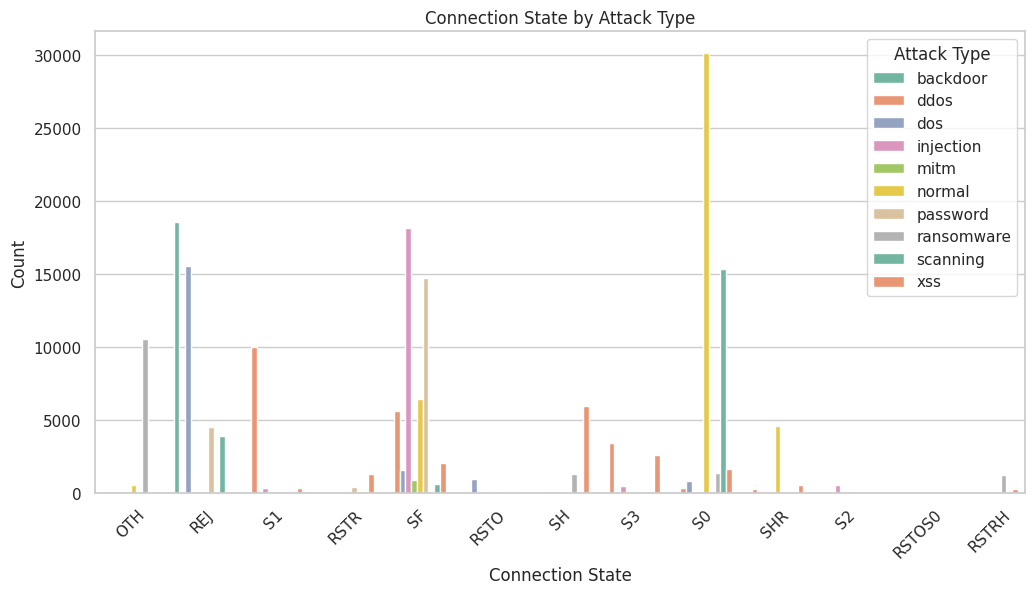

In [37]:
# Connection State by Attack Type
plt.figure(figsize=(12, 6))
sns.countplot(data=net_df, x='conn_state', hue='type', palette='Set2')
plt.title('Connection State by Attack Type')
plt.xticks(rotation=45)
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.legend(title='Attack Type')
plt.show()

### 2.9. Protocol Usage by Attack Type

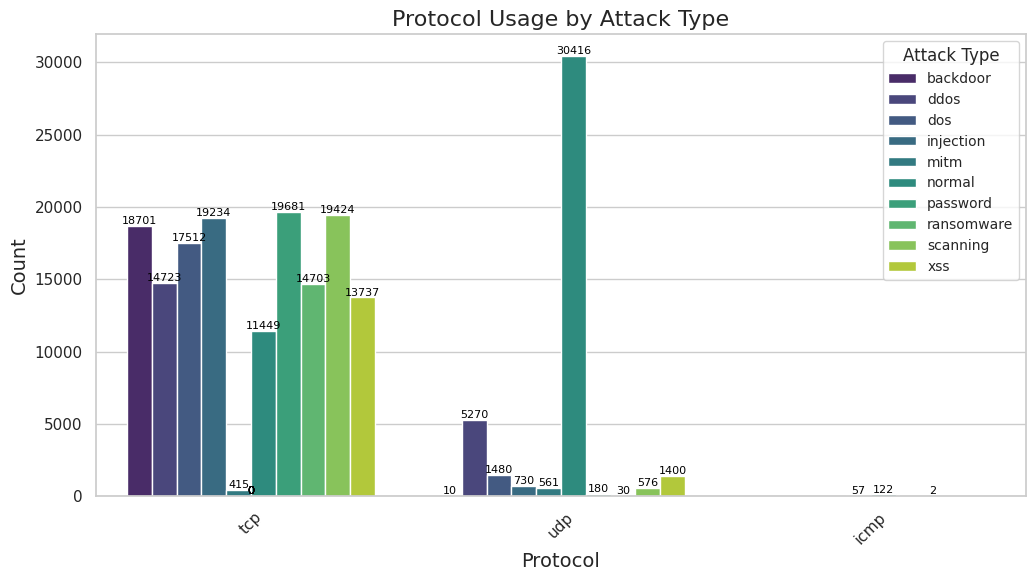

In [96]:
# Protocol Usage by Attack Type with value labels on top
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=net_df, x='proto', hue='type', palette='viridis')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', color='black', fontsize=8)

# Set labels and title
plt.title('Protocol Usage by Attack Type', fontsize=16)
plt.xlabel('Protocol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Attack Type', fontsize=10)

# Display the bar chart
plt.show()

### 2.10. Packet Information by Attack Type

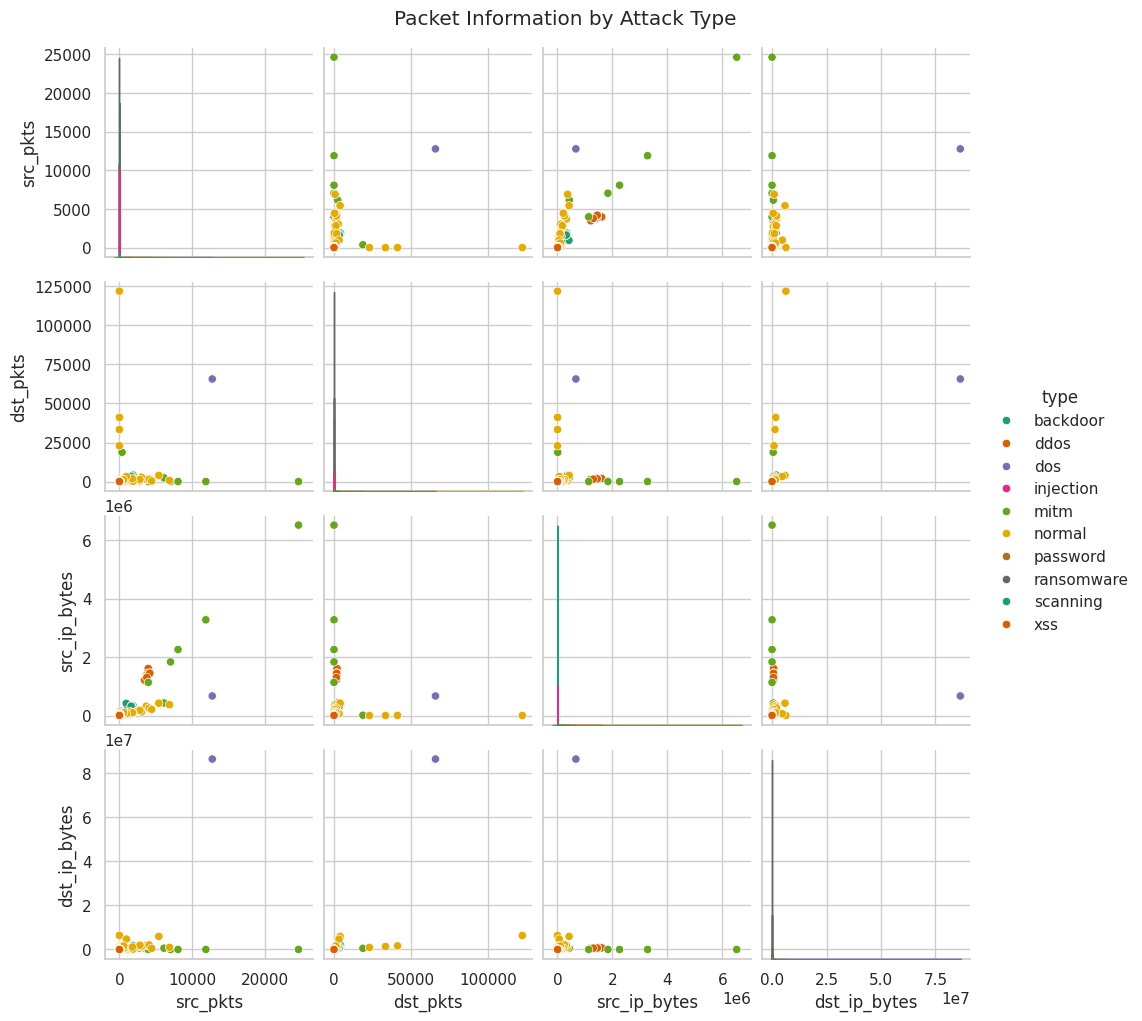

In [39]:
# Packet Information by Attack Type
sns.pairplot(net_df, vars=['src_pkts', 'dst_pkts', 'src_ip_bytes', 'dst_ip_bytes'], hue='type', palette='Dark2')
plt.suptitle('Packet Information by Attack Type', y=1.02)
plt.show()

### 2.11. Correlation Heatmap of Numerical Features

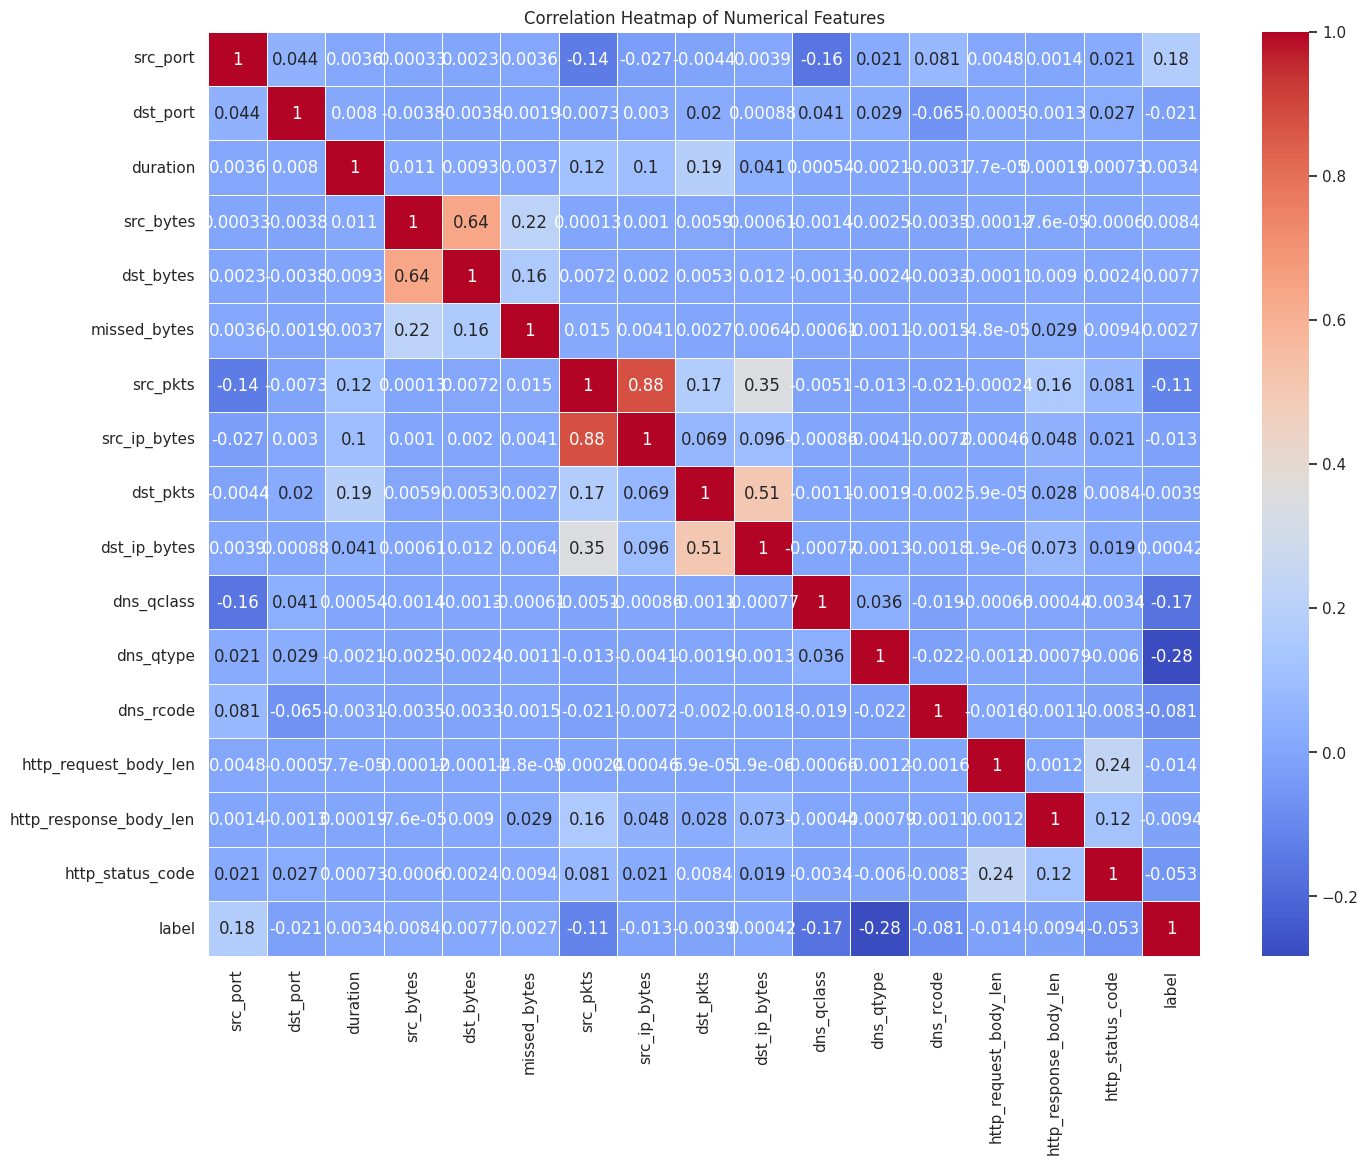

In [113]:
# Select only numerical columns (int and float types)
numerical_df = net_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## 3. Feature Engineering 🛠️


---



### 3.1. Dropping irrelevant columns and data encoding

In [114]:
# Drop columns that are not needed for the model
net_df = net_df.drop(columns=['src_ip', 'dst_ip'])

# One-Hot Encoding categorical columns except for the target variable
net_df_encoded = pd.get_dummies(net_df, columns=['proto', 'conn_state'], drop_first=True)

# Label Encoding for the target column 'type'
label_encoder = LabelEncoder()
net_df_encoded['type'] = label_encoder.fit_transform(net_df['type'])

print(f"Shape after encoding: {net_df_encoded.shape}")
print(f"Classes in 'type': {label_encoder.classes_}")

Shape after encoding: (190413, 32)
Classes in 'type': ['backdoor' 'ddos' 'dos' 'injection' 'mitm' 'normal' 'password'
 'ransomware' 'scanning' 'xss']


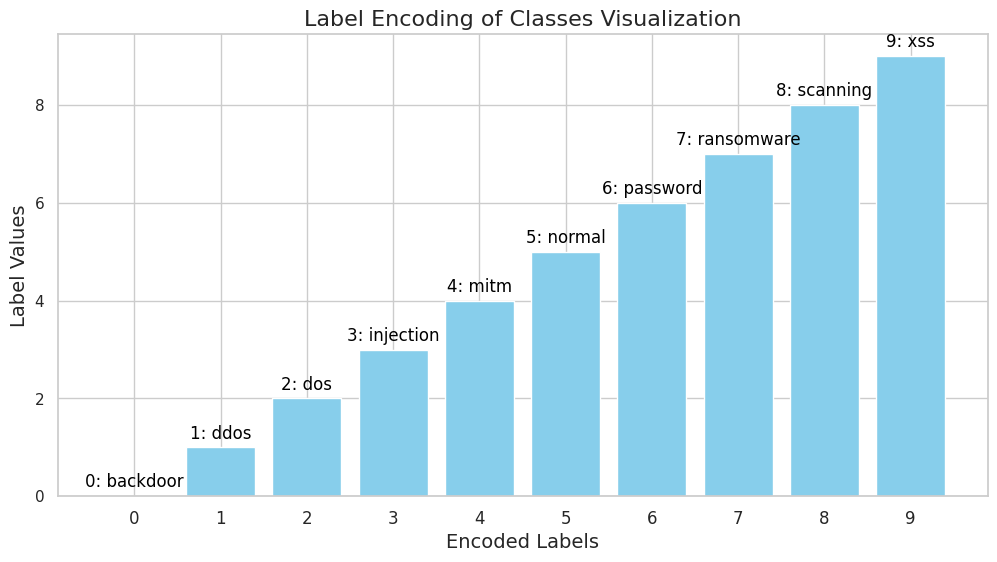

In [115]:
# Get the names of the original classes and their corresponding labels
class_labels = np.arange(len(label_encoder.classes_))  # Get label numbers (0, 1, 2, ...)
class_names = label_encoder.classes_  # Get the class names

# Create the bar chart to visualize the labels and their corresponding names
plt.figure(figsize=(12, 6))
bars = plt.bar(class_labels, class_labels, color='skyblue')

# Add value labels for each bar
for idx, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{class_labels[idx]}: {class_names[idx]}',
             ha='center', va='bottom', color='black', fontsize=12)

# Set title and labels
plt.title('Label Encoding of Classes Visualization', fontsize=16)
plt.xlabel('Encoded Labels', fontsize=14)
plt.ylabel('Label Values', fontsize=14)
plt.xticks(class_labels, fontsize=12)

# Display the chart
plt.show()

### 3.2. Train test split

In [117]:
# Separate features and target variable
X = net_df_encoded.drop(columns=['type'])
y = net_df_encoded['type']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (152330, 31)
Testing set shape: (38083, 31)


### 3.3. Apply SMOTE to the training set to balance it


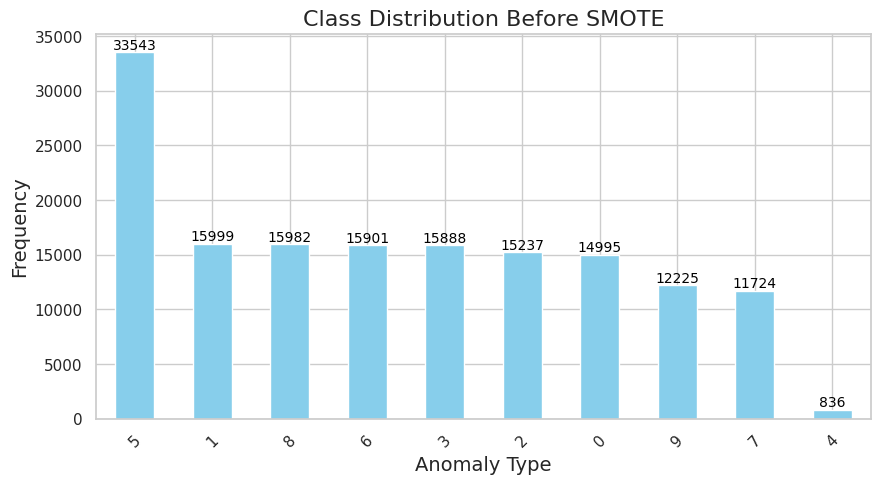

In [118]:
# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
ax = y_train.value_counts().plot(kind='bar', color='skyblue')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.title("Class Distribution Before SMOTE", fontsize=16)
plt.xlabel("Anomaly Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

In [119]:
# Apply SMOTE to the training set to balance it
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display training set shapes
print(f"Training set shape before balancing: {X_train.shape}")
print(f"Training set shape after balancing: {X_train_balanced.shape}")

Training set shape before balancing: (152330, 31)
Training set shape after balancing: (335430, 31)


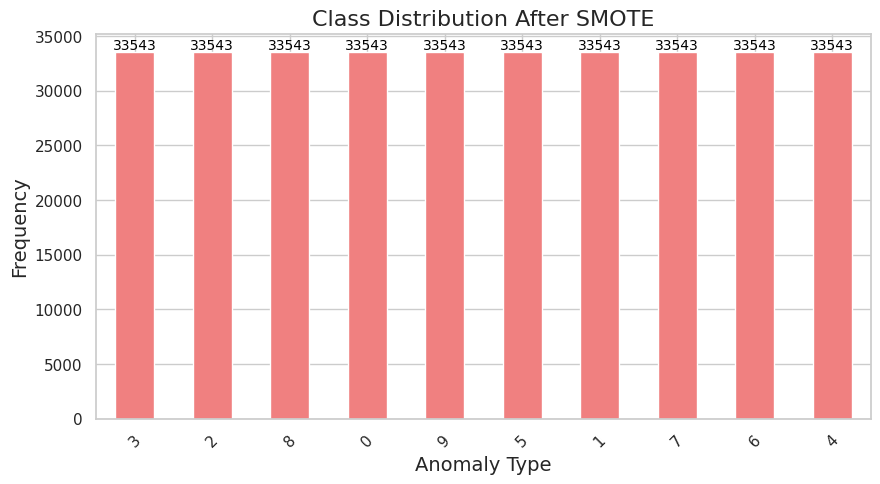

In [120]:
# Plot class distribution after SMOTE
plt.figure(figsize=(10, 5))
ax = pd.Series(y_train_balanced).value_counts().plot(kind='bar', color='lightcoral')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.title("Class Distribution After SMOTE", fontsize=16)
plt.xlabel("Anomaly Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

### 3.4. Features scaling

In [44]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the testing data
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

## 4. Models Development and Evaluation 🤖


---



### 4.1. Naive Bayes Classifier



In [45]:
# Initialize Naive Bayes Classifier
nb_model = GaussianNB(var_smoothing=1e-3)
nb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = nb_model.predict(X_test)

#### 4.1.1. Classification report

In [46]:
# Print classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3716
           1       0.93      0.58      0.71      3994
           2       0.98      0.92      0.95      3755
           3       0.19      0.06      0.10      4076
           4       0.12      0.61      0.21       197
           5       1.00      1.00      1.00      8444
           6       0.46      0.92      0.61      3960
           7       0.40      1.00      0.57      3011
           8       0.93      0.15      0.26      4018
           9       0.27      0.09      0.13      2912

    accuracy                           0.68     38083
   macro avg       0.61      0.63      0.55     38083
weighted avg       0.72      0.68      0.64     38083



#### 4.1.2. Calculate and print individual metrics


In [47]:
# Calculate and print individual metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')
nb_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes Precision: {nb_precision:.2f}")
print(f"Naive Bayes Recall: {nb_recall:.2f}")
print(f"Naive Bayes F1 Score: {nb_f1:.2f}")

Naive Bayes Accuracy: 0.68
Naive Bayes Precision: 0.72
Naive Bayes Recall: 0.68
Naive Bayes F1 Score: 0.64


#### 4.1.3. Naive Bayes Metrics Comparison

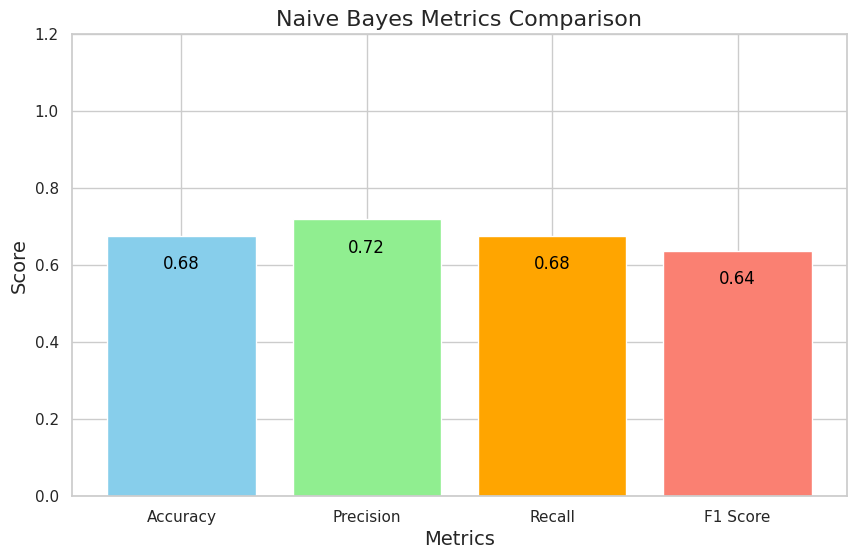

In [91]:
# Metrics for Naive Bayes
metrics = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1 Score': nb_f1
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Add value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.05, f'{yval:.2f}', ha='center', va='top', color='black', fontsize=12)

# Set title and labels
plt.title('Naive Bayes Metrics Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.2)

# Display the bar chart
plt.show()

#### 4.1.4. Plot confusion matrix


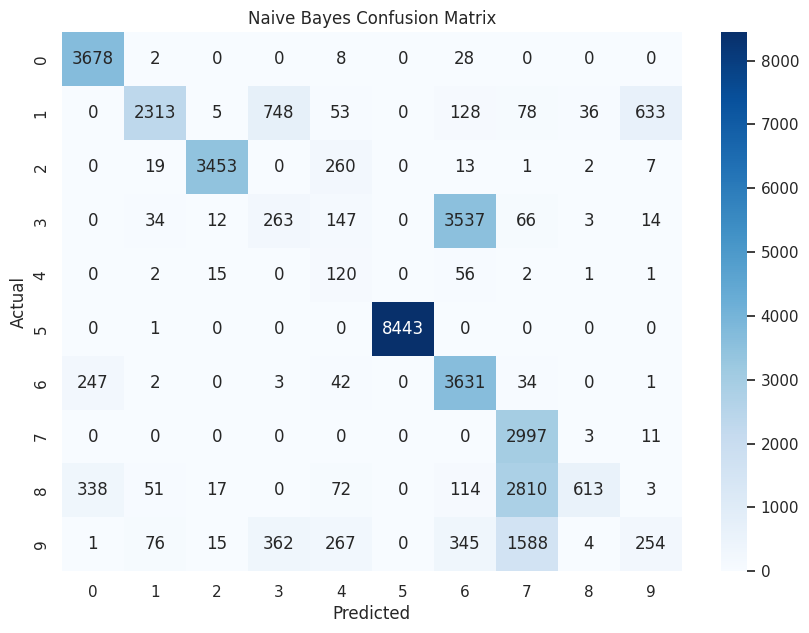

In [48]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.2. AdaBoost Classifier

In [49]:
# Initialize and train AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_balanced, y_train_balanced)
y_pred = ada_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### 4.2.1. Classification report

In [50]:
# Print classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.49      0.60      3716
           1       0.00      0.00      0.00      3994
           2       1.00      0.92      0.96      3755
           3       0.00      0.00      0.00      4076
           4       0.00      0.00      0.00       197
           5       1.00      1.00      1.00      8444
           6       0.28      0.99      0.44      3960
           7       0.98      0.97      0.97      3011
           8       0.63      0.82      0.71      4018
           9       0.87      0.51      0.64      2912

    accuracy                           0.67     38083
   macro avg       0.55      0.57      0.53     38083
weighted avg       0.63      0.67      0.62     38083



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4.2.2. Calculate and print individual metrics


In [51]:
# Calculate and print individual metrics
ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred, average='weighted')
ada_recall = recall_score(y_test, y_pred, average='weighted')
ada_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")
print(f"AdaBoost Precision: {ada_precision:.2f}")
print(f"AdaBoost Recall: {ada_recall:.2f}")
print(f"AdaBoost F1 Score: {ada_f1:.2f}")

AdaBoost Accuracy: 0.67
AdaBoost Precision: 0.63
AdaBoost Recall: 0.67
AdaBoost F1 Score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4.2.3. AdaBoost Metrics Comparison

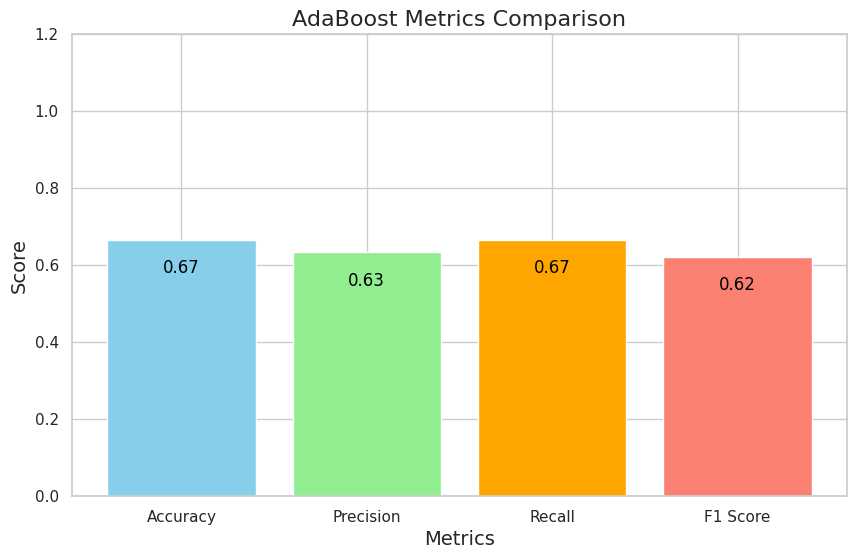

In [84]:
# Metrics for AdaBoost
metrics = {
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1 Score': ada_f1
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Add value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f'{yval:.2f}', ha='center', va='top', color='black', fontsize=12)

# Set title and labels
plt.title('AdaBoost Metrics Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.2)

# Display the bar chart
plt.show()


#### 4.2.2. Plot confusion matrix


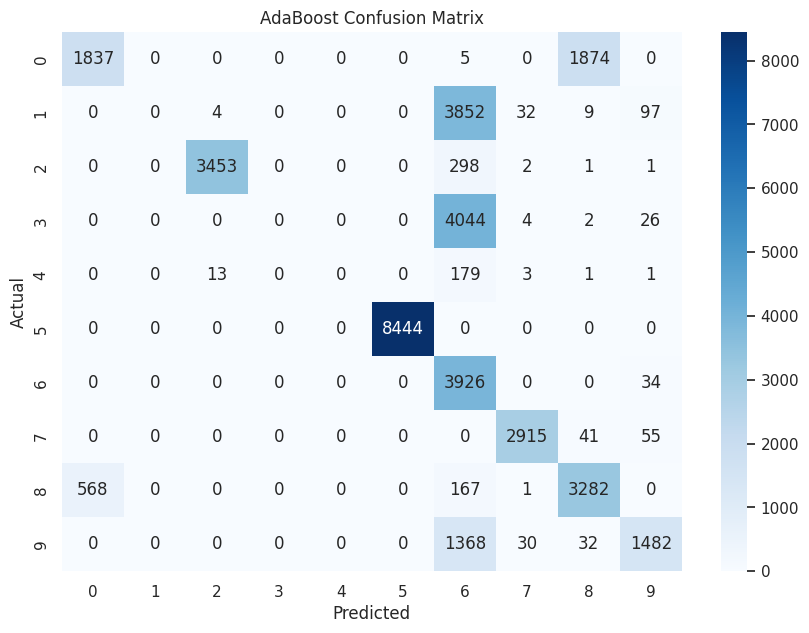

In [52]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.3. LogisticRegression Classifier

In [53]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4.3.1. Classification report

In [54]:
# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      3716
           1       0.94      0.90      0.92      3994
           2       1.00      0.92      0.96      3755
           3       0.73      0.66      0.69      4076
           4       0.15      0.83      0.26       197
           5       1.00      1.00      1.00      8444
           6       0.63      0.51      0.56      3960
           7       0.90      0.94      0.92      3011
           8       0.89      0.71      0.79      4018
           9       0.81      0.77      0.79      2912

    accuracy                           0.84     38083
   macro avg       0.77      0.82      0.77     38083
weighted avg       0.86      0.84      0.84     38083



#### 4.3.2. Calculate and print individual metrics


In [55]:
# Calculate and print individual metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Logistic Regression Precision: {lr_precision:.2f}")
print(f"Logistic Regression Recall: {lr_recall:.2f}")
print(f"Logistic Regression F1 Score: {lr_f1:.2f}")

Logistic Regression Accuracy: 0.84
Logistic Regression Precision: 0.86
Logistic Regression Recall: 0.84
Logistic Regression F1 Score: 0.84


#### 4.3.3. Logistic Regression Metrics Comparison

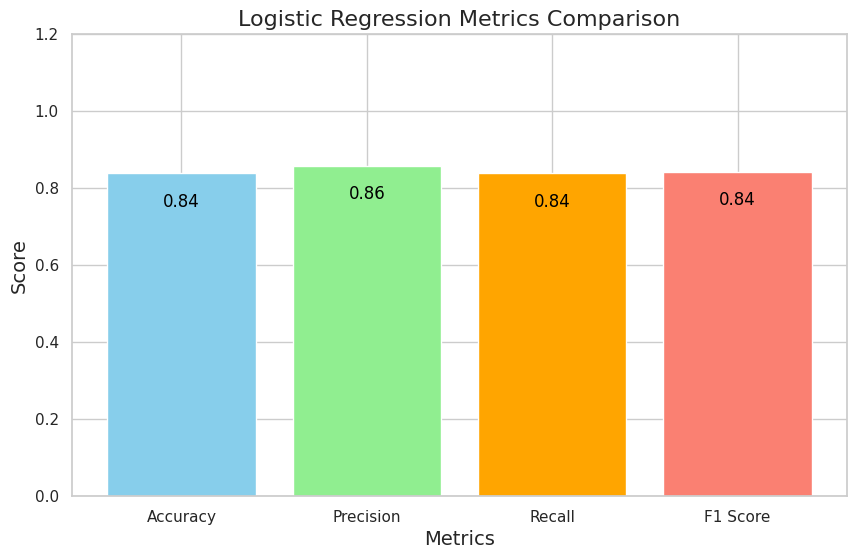

In [85]:
# Metrics for Logistic Regression
metrics = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1 Score': lr_f1
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Add value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.05, f'{yval:.2f}', ha='center', va='top', color='black', fontsize=12)

# Set title and labels
plt.title('Logistic Regression Metrics Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.2)

# Display the bar chart
plt.show()

#### 4.3.4. Plot confusion matrix


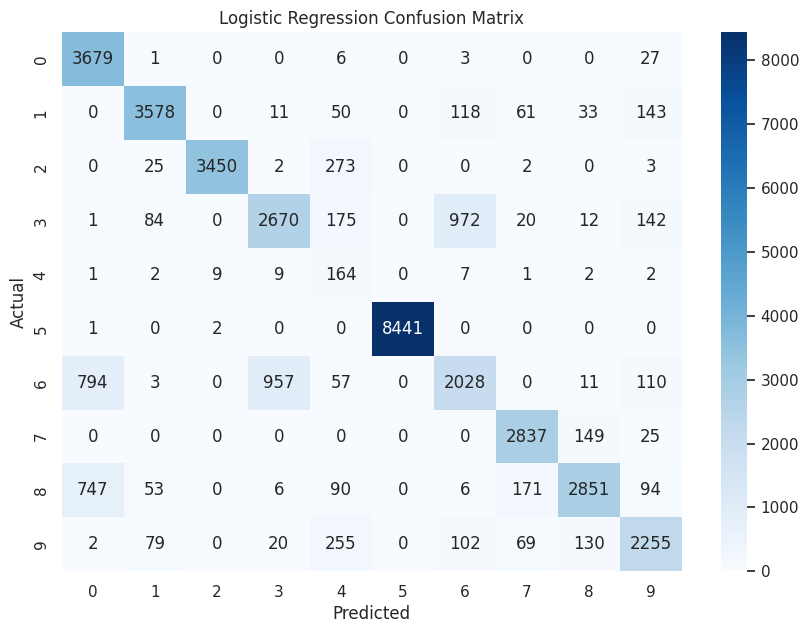

In [56]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.4. KNeighbors Classifier

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train_balanced, y_train_balanced)
y_pred = knn_model.predict(X_test)


#### 4.4.1. Classification report

In [62]:
# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3716
           1       0.95      0.95      0.95      3994
           2       0.99      0.95      0.97      3755
           3       0.91      0.88      0.90      4076
           4       0.21      0.79      0.34       197
           5       1.00      1.00      1.00      8444
           6       0.93      0.91      0.92      3960
           7       0.97      0.99      0.98      3011
           8       0.99      0.96      0.97      4018
           9       0.89      0.88      0.89      2912

    accuracy                           0.95     38083
   macro avg       0.88      0.93      0.89     38083
weighted avg       0.96      0.95      0.96     38083



#### 4.4.2. Calculate and print individual metrics


In [63]:
# Calculate and print individual metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"KNN Precision: {knn_precision:.2f}")
print(f"KNN Recall: {knn_recall:.2f}")
print(f"KNN F1 Score: {knn_f1:.2f}")

KNN Accuracy: 0.95
KNN Precision: 0.96
KNN Recall: 0.95
KNN F1 Score: 0.96


#### 4.4.3. KNN Metrics Comparison

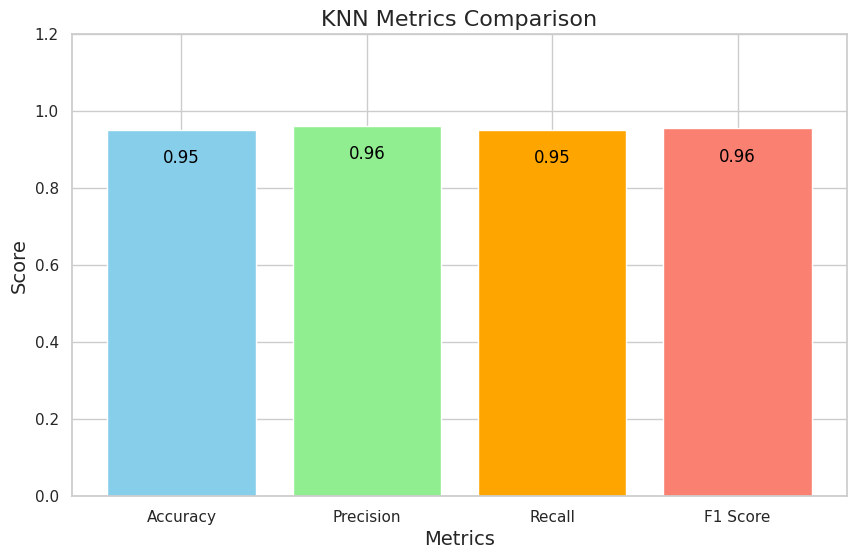

In [86]:
# Metrics for KNN
metrics = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Add value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.05, f'{yval:.2f}', ha='center', va='top', color='black', fontsize=12)

# Set title and labels
plt.title('KNN Metrics Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.2)

# Display the bar chart
plt.show()

#### 4.4.4. Plot confusion matrix


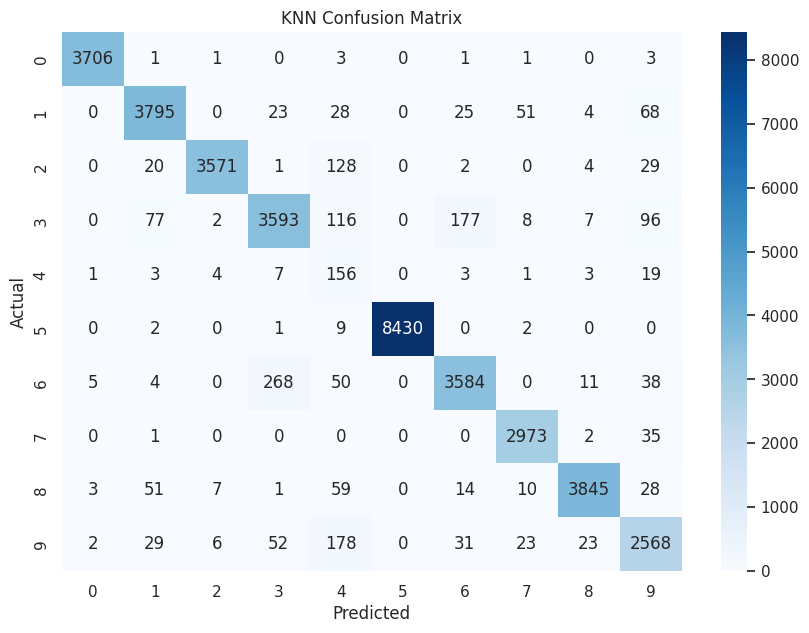

In [64]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5. Stacking Ensemble Classifier

In [73]:
# Initialize individual models
estimators = [
    ('knn', KNeighborsClassifier()),
    ('logistic', LogisticRegression(random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('adaboost', AdaBoostClassifier(random_state=42))
]

# Initialize the Stacking Classifier with a meta-learner
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

# Train the stacking ensemble
stacking_classifier.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('logistic',
                                LogisticRegression(random_state=42)),
                               ('naive_bayes', GaussianNB()),
                               ('adaboost',
                                AdaBoostClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

#### 4.5.1. Classification report

In [74]:
# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Print classification report for detailed metrics per class
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred))


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3716
           1       0.98      0.96      0.97      3994
           2       0.99      0.97      0.98      3755
           3       0.95      0.91      0.93      4076
           4       0.37      0.76      0.50       197
           5       1.00      1.00      1.00      8444
           6       0.96      0.96      0.96      3960
           7       1.00      1.00      1.00      3011
           8       0.98      0.98      0.98      4018
           9       0.90      0.94      0.92      2912

    accuracy                           0.97     38083
   macro avg       0.91      0.95      0.92     38083
weighted avg       0.97      0.97      0.97     38083



#### 4.5.2. Calculate and print individual metrics

In [75]:
# Calculate metrics
stacking_accuracy = accuracy_score(y_test, y_pred)
stacking_precision = precision_score(y_test, y_pred, average='weighted')  # You can use 'macro' if you prefer
stacking_recall = recall_score(y_test, y_pred, average='weighted')  # You can use 'macro' if you prefer
stacking_f1 = f1_score(y_test, y_pred, average='weighted')  # You can use 'macro' if you prefer

# Print metrics with 2 decimal places
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2f}")
print(f"Stacking Classifier Precision: {stacking_precision:.2f}")
print(f"Stacking Classifier Recall: {stacking_recall:.2f}")
print(f"Stacking Classifier F1 Score: {stacking_f1:.2f}")

Stacking Classifier Accuracy: 0.97
Stacking Classifier Precision: 0.97
Stacking Classifier Recall: 0.97
Stacking Classifier F1 Score: 0.97


#### 4.5.3. Stacking Classifier Metrics Comparison

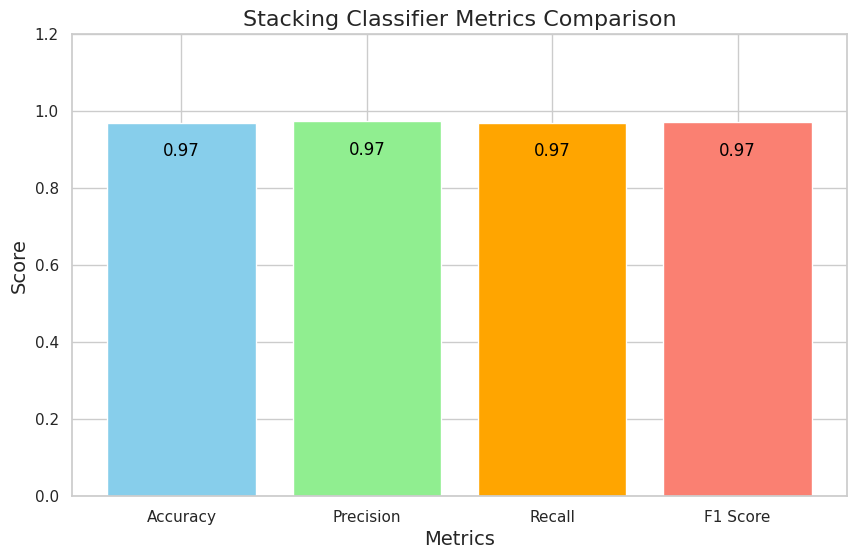

In [87]:
# Metrics for Stacking Classifier
metrics = {
    'Accuracy': stacking_accuracy,
    'Precision': stacking_precision,
    'Recall': stacking_recall,
    'F1 Score': stacking_f1
}

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon'])

# Add value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.05, f'{yval:.2f}', ha='center', va='top', color='black', fontsize=12)

# Set title and labels
plt.title('Stacking Classifier Metrics Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.2)  # Set y-limit to ensure labels fit inside the bars

# Display the bar chart
plt.show()

#### 4.5.4. Plot confusion matrix

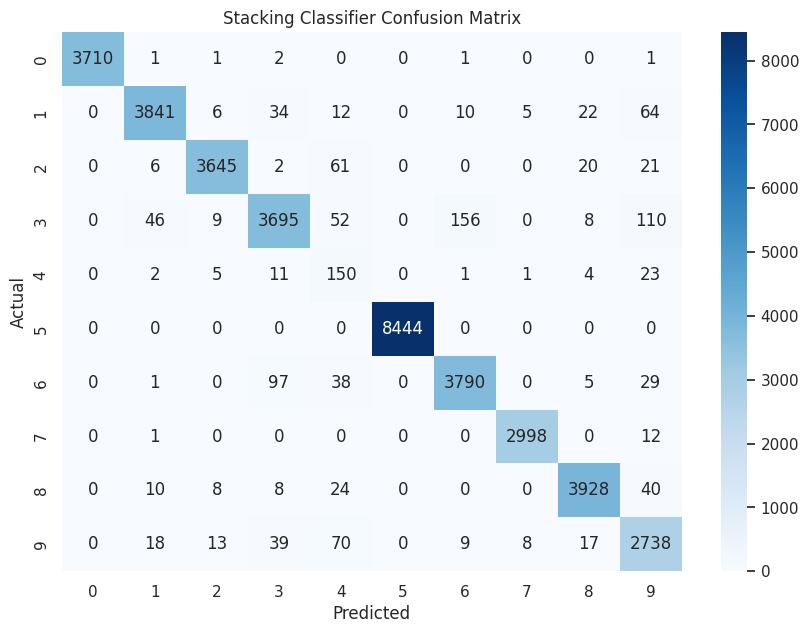

In [76]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5. Models accuracies comparison ⚖️

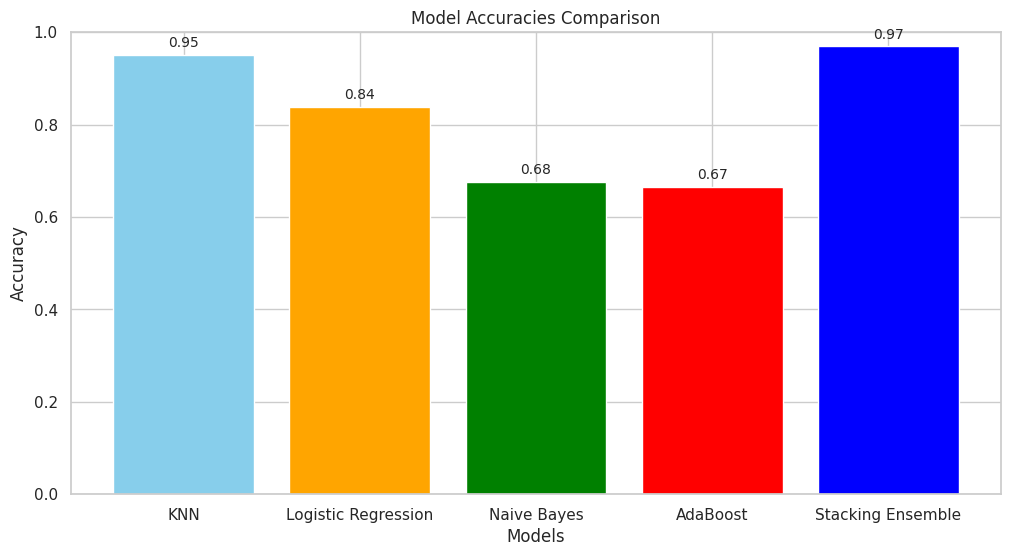

In [77]:
# Accuracies from each model (make sure these variables have valid values)
model_names = ['KNN', 'Logistic Regression', 'Naive Bayes', 'AdaBoost', 'Stacking Ensemble']
accuracies = [knn_accuracy, lr_accuracy, nb_accuracy, ada_accuracy, stacking_accuracy]

# Plot the bar chart for accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'blue'])
plt.ylim(0, 1.0)  # Set y-axis range from 0 to 1 to fully capture all accuracy bars
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')

# Annotate the bars with accuracy values
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

## 6. Model saving and network traffic prediction 🔮

### 6.1. Save the trained stacking classifier model to a file


In [67]:
# Save the trained stacking classifier model to a file
joblib.dump(stacking_classifier, 'stacking_classifier_model.pkl')

print("Model saved successfully.")

Model saved successfully.


### 6.2. Fit and save the label encoder to a file


In [68]:
# Fitted the LabelEncoder
label_encoder = LabelEncoder()
net_df_encoded['type'] = label_encoder.fit_transform(net_df['type'])

# Save the label encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Label encoder saved successfully.")

Label encoder saved successfully.


### 6.3. Make network anomly prediction

In [71]:
# Load the saved model
loaded_model = joblib.load('stacking_classifier_model.pkl')

# Load the saved label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Create a sample input as a DataFrame
sample_data = pd.DataFrame({
    'src_port': [12345],
    'dst_port': [80],
    'proto': ['tcp'],  # Example protocol
    'service': ['http'],  # Example service
    'duration': [0.12],
    'src_bytes': [450],
    'dst_bytes': [1200],
    'conn_state': ['SF'],  # Example connection state
    'missed_bytes': [0],
    'src_pkts': [5],
    'src_ip_bytes': [800],
    'dst_pkts': [7],
    'dst_ip_bytes': [900],
    'http_trans_depth': ['0'],
    'http_request_body_len': [0],
    'http_response_body_len': [0],
    'http_status_code': [200],
    'label': [1]
})

# One-Hot Encode the categorical columns in the same way as during training
sample_data_encoded = pd.get_dummies(sample_data, columns=['proto', 'service', 'conn_state', 'http_trans_depth'])

# Align the sample_data_encoded columns with the training data columns (df_encoded)
# Fill any missing columns with zeros
missing_cols = set(net_df_encoded.columns) - set(sample_data_encoded.columns)
for col in missing_cols:
    sample_data_encoded[col] = 0

# Ensure the column order matches the training data
sample_data_encoded = sample_data_encoded[net_df_encoded.columns.drop('type')]

# Convert to NumPy array for prediction
final_sample_input = sample_data_encoded.values

# Predict using the loaded model
prediction = loaded_model.predict(final_sample_input)

# Convert the predicted class number to the actual label name
predicted_class_name = label_encoder.inverse_transform([prediction[0]])

# Print the predicted class name
print(f"Predicted Class: {predicted_class_name[0]}")

Predicted Class: dos
